# Asymptotic solutions in short-times

Projectile motion in a linear potential field with images is described by the equation

$$y_{\tau \tau} + \alpha \frac{1}{(1 + \epsilon y)^2} + 1= 0,$$

with $y(0) = \epsilon$ and $y_{\tau}(0)=1$, and where $\epsilon \ll 1$ is expected.

In [1]:
import sympy as sym
from sympy import init_printing
init_printing(order='rev-lex') 

In [2]:
y, eps, a, b, t, alpha = sym.symbols('y, epsilon, a, b, t, alpha')
y0 = sym.Function('y0')(t)
y1 = sym.Function('y1')(t)
y2 = sym.Function('y2')(t)
y3 = sym.Function('y3')(t)
y4 = sym.Function('y4')(t)

In [3]:
y = sym.Eq(y0 + eps*y1 + eps**2*y2 + eps**3*y3 + eps**4*y4) # naive expansion

class f(sym.Function):
    
    @classmethod
    def eval(cls, y):
        return y.lhs.diff(t,t) + alpha*1/(1 + eps*y.lhs)**2 + 1
        #return y.lhs.diff(tau, tau) + eps/y.lhs**2


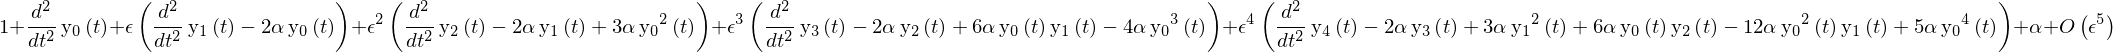

In [4]:
the_series = sym.series(f(y), eps, x0=0, n=5)
by_order = sym.collect(the_series, eps, evaluate=False)
the_series

### $\mathcal{O} \left( 1 \right) \mbox{Solution}$

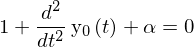

In [5]:
sym.Eq(by_order[1].removeO())

In [6]:
eqn = sym.Eq(by_order[1].removeO())    #1 + y0(tau).diff(tau, tau))
soln0 = sym.dsolve(eqn, y0)
constants = sym.solve([soln0.rhs.subs(t,0) - 0, \
                      soln0.rhs.diff(t).subs(t,0) - 1])
C1, C2 = sym.symbols('C1 C2')
soln0 = soln0.subs(constants)
print(sym.latex(soln0))

\operatorname{y_{0}}{\left (t \right )} = t + \frac{t^{2} \left(-1 - \alpha\right)}{2}


### $\mathcal{O} \left( \epsilon \right) \mbox{Solution}$

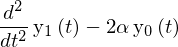

In [7]:
by_order[eps]

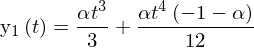

In [8]:
try:
    eqn = sym.Eq(by_order[eps].replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps])
    
soln1 = sym.dsolve(eqn, y1)
constants = sym.solve([soln1.rhs.subs(t,0) - 0, \
                      soln1.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln1 = soln1.subs(constants)
soln1


### $\mathcal{O} \left( \epsilon^2 \right) \mbox{Solution}$

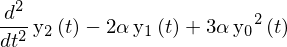

In [9]:
by_order[eps**2]

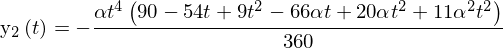

In [10]:
try:
    eqn = sym.Eq(by_order[eps**2].replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**2].replace(y1, soln1.rhs))
    
soln2 = sym.dsolve(eqn, y2)
constants = sym.solve([soln2.rhs.subs(t,0) - 0, \
                      soln2.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln2 = soln2.subs(constants)
sym.factor(soln2)

### $\mathcal{O} \left( \epsilon^3 \right) \mbox{Solution}$

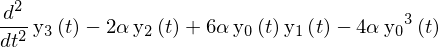

In [11]:
by_order[eps**3]

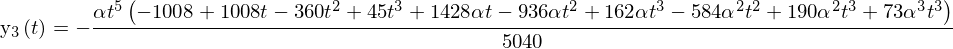

In [12]:
try:
    eqn = sym.Eq(by_order[eps**3].replace(y2, soln2.rhs).replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**3].replace(y2, soln2.rhs))
    
soln3 = sym.dsolve(eqn, y3)
constants = sym.solve([soln3.rhs.subs(t,0) - 0, \
                      soln3.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln3 = soln3.subs(constants)
sym.factor(soln3)

### $\mathcal{O} \left( \epsilon^4 \right) \mbox{Solution}$

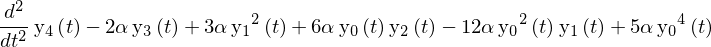

In [13]:
by_order[eps**4]

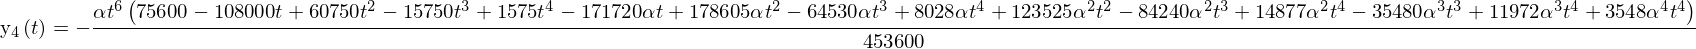

In [14]:
try:
    eqn = sym.Eq(by_order[eps**4].replace(y3, soln3.rhs).replace(
        y2, soln2.rhs).replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**4].replace(y3, soln3.rhs))
    
soln4 = sym.dsolve(eqn, y4)
constants = sym.solve([soln4.rhs.subs(t,0) - 0, \
                      soln4.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln4 = soln4.subs(constants)
sym.factor(soln4)

### $\mbox{Composite Solution}$

\operatorname{y_{comp}} = t + \frac{t^{2} \left(-1 - \alpha\right)}{2} + \epsilon \left(\frac{\alpha t^{3}}{3} + \frac{\alpha t^{4} \left(-1 - \alpha\right)}{12}\right) + \epsilon^{2} \left(- \frac{\alpha t^{4}}{4} + \frac{\alpha t^{5} \left(9 + 11 \alpha\right)}{60} + \frac{\alpha t^{6} \left(-9 - 20 \alpha - 11 \alpha^{2}\right)}{360}\right) + \epsilon^{3} \left(\frac{\alpha t^{5}}{5} + \frac{\alpha t^{6} \left(-12 - 17 \alpha\right)}{60} + \frac{\alpha t^{7} \left(45 + 117 \alpha + 73 \alpha^{2}\right)}{630} + \frac{\alpha t^{8} \left(-45 - 162 \alpha - 190 \alpha^{2} - 73 \alpha^{3}\right)}{5040}\right) + \epsilon^{4} \left(- \frac{\alpha t^{6}}{6} + \frac{\alpha t^{7} \left(100 + 159 \alpha\right)}{420} + \frac{\alpha t^{8} \left(-150 - 441 \alpha - 305 \alpha^{2}\right)}{1120} + \frac{\alpha t^{9} \left(1575 + 6453 \alpha + 8424 \alpha^{2} + 3548 \alpha^{3}\right)}{45360} + \frac{\alpha t^{10} \left(-1575 - 8028 \alpha - 14877 \alpha^{2} - 11972 \alpha^{3} - 3548 \alpha^{4}\right

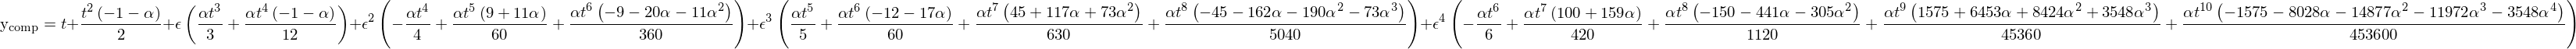

In [15]:
y_comp = sym.symbols('y_{comp}', cls=sym.Function)
try:
    y_comp = sym.Eq(y_comp, soln0.rhs + eps*soln1.rhs + eps**2*soln2.rhs + eps**3*soln3.rhs + eps**4*soln4.rhs) # + eps**2*soln2.rhs)
except NameError:
    y_comp = sym.Eq(y_comp, eps*soln1.rhs + eps**2*soln2.rhs + eps**3*soln3.rhs + eps**4*soln4.rhs) # + eps**2*soln2.rhs)
    
print(sym.latex(y_comp))
y_comp

### $\mbox{The Trajectory}$

In [16]:
def savefig(filename, pics):
    if pics == True:
        plt.savefig('../doc/figures/{}.png'.format(filename), bbox_inches='tight', dpi=400)
    else:
        pass
pics = True

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


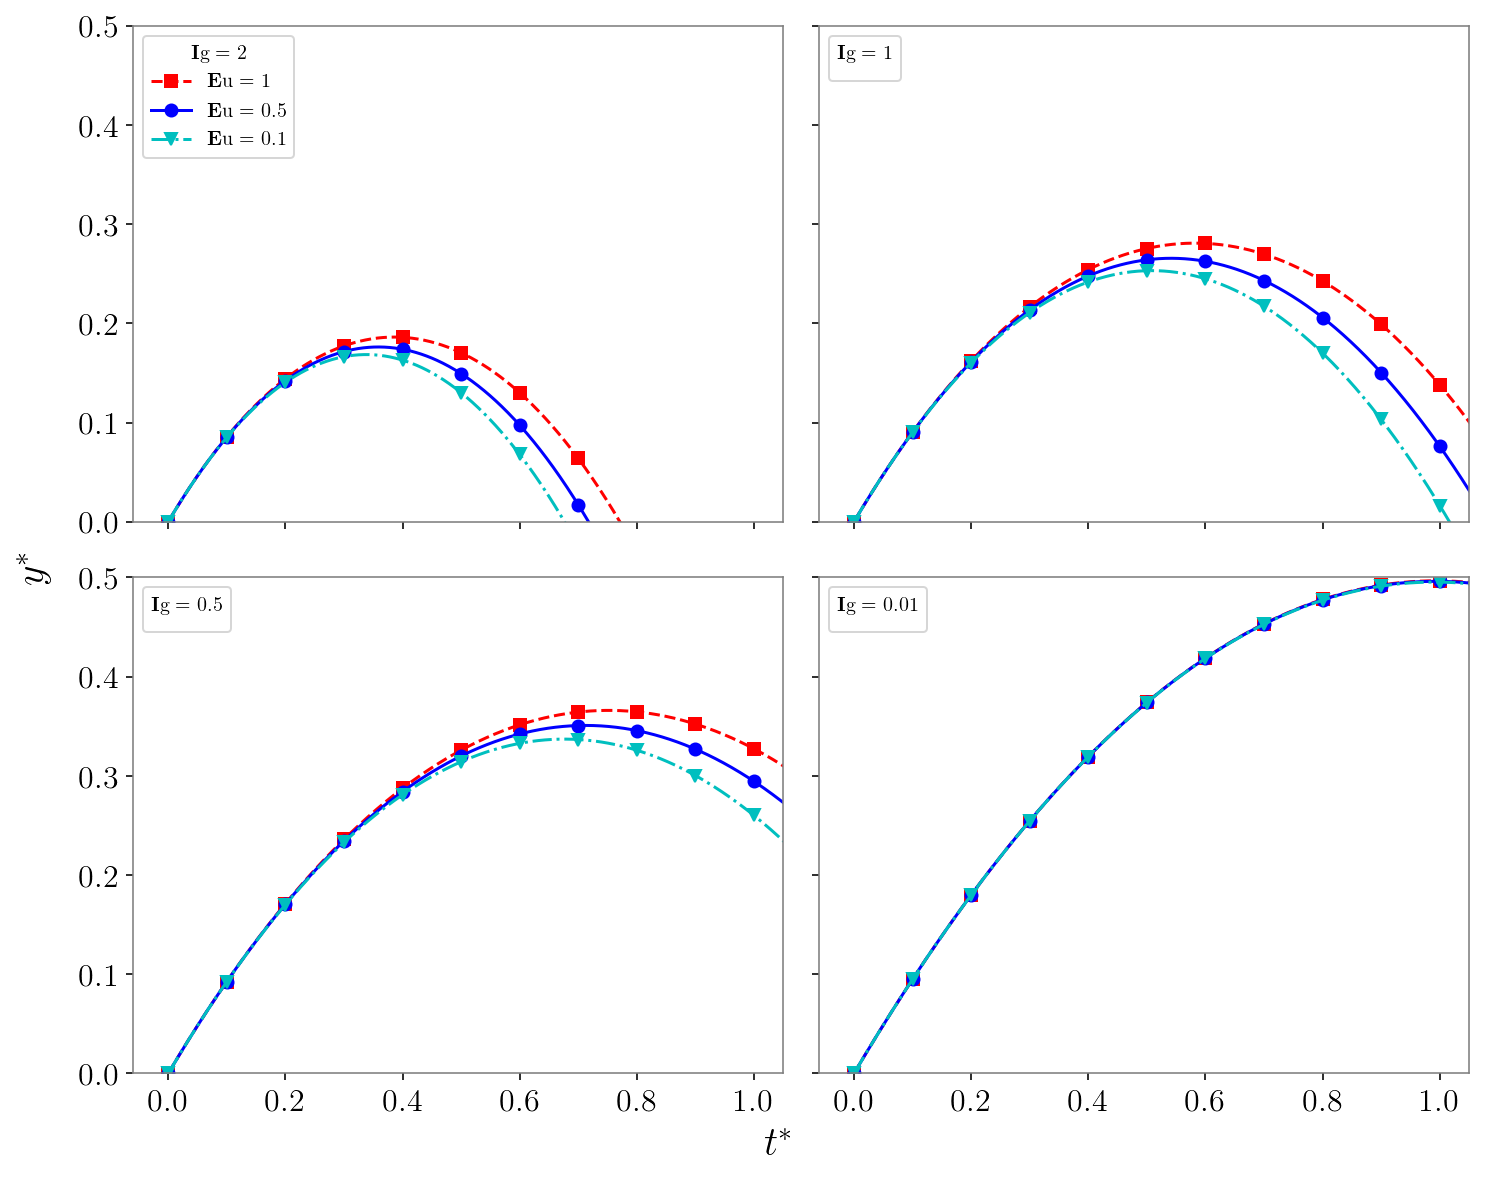

In [29]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sp


%config InlineBackend.figure_format = 'retina'
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.rcParams['figure.dpi'] = 300
%matplotlib inline
matplotlib.rcParams.update(
{   'text.color': 'k',
    'xtick.color': 'k',
    'ytick.color': 'k',
    'axes.labelcolor': 'k'
})

eps_val = [.1, .5, 1.][::-1]
linestyle = ['rs--', 'bo-', 'cv-.', 'k+:', 'm']
tt = sp.arange(0,1.2,0.001)
al = [2, 1., .5, .01]

fig, axs = plt.subplots(2,2, figsize=(10, 8), sharex='col', sharey='row')
fig.subplots_adjust(hspace = .2, wspace=.2)
axs = axs.ravel()
i = 0
for aas in al:
    yc = y_comp.rhs.subs(alpha, aas)
    #plt.figure(figsize=(6, 4), dpi=100)
    for keys, vals in enumerate(eps_val):
        y_compP = sym.lambdify(t, yc.subs(eps, vals), 'numpy')
        if aas == 2:
            label='$\mathbf{E}\mbox{u}=$'+ ' {}'.format(vals).rstrip('0').rstrip('.')
        else:
            label=None
        axs[i].plot(tt, y_compP(tt), linestyle[keys],label=label,
                 markevery=100)
    axs[i].set_ylim(ymin=0., ymax=0.5)
    axs[i].set_xlim(xmax=1.05)
    axs[i].tick_params(axis='both', which='major', labelsize=16)
    axs[i].legend(title = r'$\mathbf{I}\mbox{g} = $' + ' {:1.2f}'.format(aas).rstrip('0').rstrip('.'), loc=2)
    i += 1

fig.text(0.5, -0.01, r'$t^*$', ha='center', fontsize=20)
fig.text(-0.03, 0.5, r'$y^*$', va='center', rotation='vertical', fontsize=20)
fig.tight_layout()
savefig('short_times', pics)
plt.show()

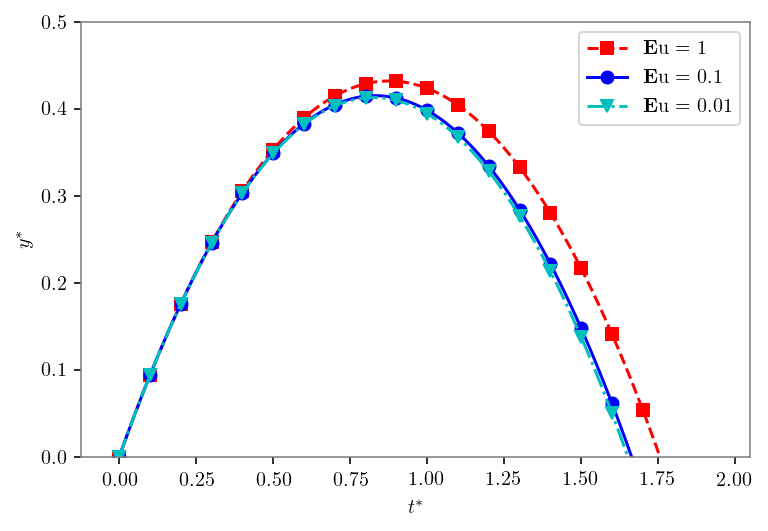

In [30]:
eps_val = [.01, .1, 1.][::-1]
linestyle = ['rs--', 'bo-', 'cv-.', 'k+:', 'm']
tt = sp.arange(0,2.5,0.001)
yc = y_comp.rhs.subs(alpha, eps*0.0121 + 0.2121)

plt.figure(figsize=(6, 4))#, dpi=100)
for keys, vals in enumerate(eps_val):
    y_compP = sym.lambdify(t, yc.subs(eps, vals), 'numpy')
    plt.plot(tt, y_compP(tt), linestyle[keys], label='$\mathbf{E}\mbox{u} =$'+ ' {}'.format(vals).rstrip('0').rstrip('.'),
             markevery=100)
plt.ylim(ymin=0., ymax=0.5)
plt.xlim(xmax=2.05)
plt.legend()

plt.xlabel(r'$t^*$')
plt.ylabel(r'$y^*$')
#savefig('short_times_better', pics)
plt.show()

## Time aloft

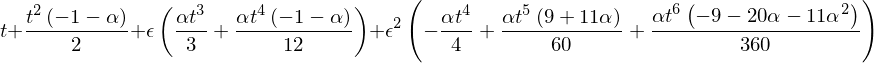

In [19]:
y2 = sym.symbols('y2', cls=sym.Function)
y2 = sym.Function('y2')(t)
try:
    y2 = sym.Eq(y2, soln0.rhs + eps*soln1.rhs + eps**2*soln2.rhs) # + eps**2*soln2.rhs)
except NameError:
    y2 = sym.Eq(y2, eps*soln1.rhs + eps**2*soln2.rhs)
y2.rhs
#y2.diff(t)

In [20]:
tau0, tau1, tau2 = sym.symbols('tau0 tau1 tau2')
tau = sym.Eq(tau0 + eps*tau1 + eps**2*tau2)
y3 = y2.rhs.subs(t, tau.lhs).series(eps)
col = sym.collect(y3, eps, evaluate=False)

### $\mathcal{O} \left( 1 \right) \mbox{Solution}$

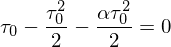

In [21]:
#tau0 = 2
sym.Eq(col[1].removeO())

### $\mathcal{O} \left( \epsilon \right) \mbox{Solution}$

In [22]:
order_eps = col[eps].subs(tau0, 2)
order_eps 
soln_eps = sym.solve(order_eps, tau1)

### $\mathcal{O} \left( \epsilon^2 \right) \mbox{Solution}$

In [23]:
order_eps2 = col[eps**2].subs(tau0, 2).subs(tau1, soln_eps[0])
order_eps2
soln_eps2 = sym.solve(order_eps2, tau2)

### Composite Solution
Using the linear regression for Im.

Eq(-epsilon**2*(0.0484*epsilon + 8*(0.0121*epsilon + 0.2121)**5 + 24*(0.0121*epsilon + 0.2121)**4 - 16*(0.0121*epsilon + 0.2121)**3 + 0.8484)/(0.363*epsilon + 40*(0.0121*epsilon + 0.2121)**3 + 60*(0.0121*epsilon + 0.2121)**2 + 11.363) + 4*epsilon*(-0.0121*epsilon + 0.7879)*(0.0121*epsilon + 0.2121)/(3*(0.0242*epsilon + 1.4242)) + 2, 0)


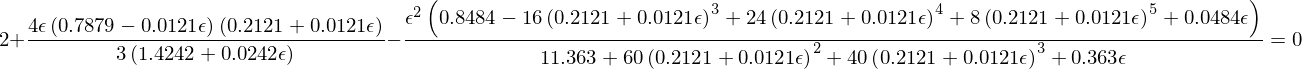

In [24]:
tau0, tau1, tau2 = sym.symbols('tau0 tau1 tau2')
tau = sym.Eq(tau0 + eps*tau1 + eps**2*tau2)
tau = tau.subs(tau0, 2).subs(tau1, soln_eps[0]).subs(tau2, soln_eps2[0])
print(str(tau.subs(alpha, eps*0.0121 + 0.2121)))
tau.subs(alpha, eps*0.0121 + 0.2121)

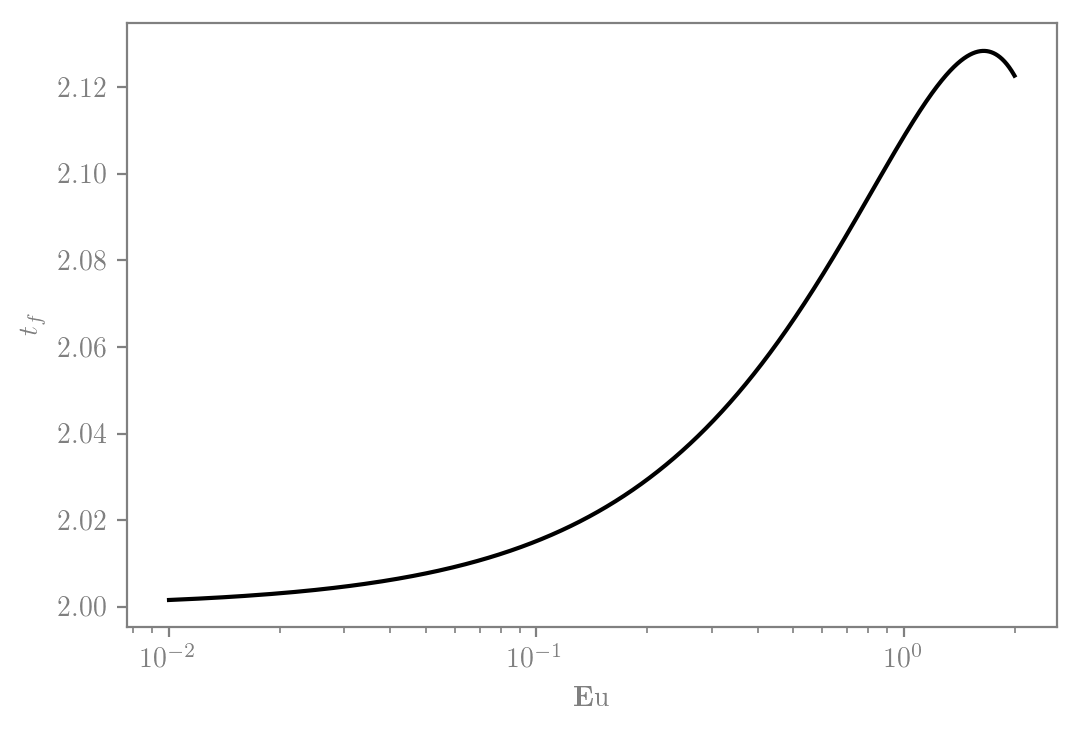

In [25]:
ttt = np.arange(0.01, 2.,0.001)
#betas = [bet]
linestyle = ['k','rs--', 'bo-', 'cv-.', 'k+:', 'm']
plt.figure(figsize=(6, 4), dpi=100)

#taun = tau.subs(beta, vals)
tau_soln = sym.lambdify(eps, tau.lhs.subs(alpha, eps*0.0121 + 0.2121), 'numpy')
plt.semilogx(ttt, tau_soln(ttt), 'k', markevery=100)
plt.xlabel(r'$\mathbf{E}\mbox{u}$')
plt.ylabel(r'$t_f$')
#plt.legend()
#savefig('drag', pics)
plt.show();